In [1]:
import pickle
import math

from traffic.core import Traffic
from matplotlib import pyplot as plt
from functions.data_filtering import get_complete_flights
from functions.data_processing import get_takeoff_and_landing_directions
from functions.data_loading import get_data_range
from datetime import datetime

In [2]:
flights: Traffic = get_data_range('oslo', 'bergen', datetime(year=2023, month=1, day=1), datetime(year=2024, month=1, day=1))

OSError: [Errno 22] Invalid argument: 'data/oslo-bergen-2023-01-01-2024-01-01 00:00:00.pkl'

In [82]:
filtered_flights = Traffic.from_flights(get_complete_flights(flights, 'bergen', 'oslo'))

In [83]:
filtered_flights

icao24 callsign   count
0  478dd9     AKK2  154057
1  4ac958   SAS252   64652
2  47a48c   BNO93J   57318
3  47c1c6     BNOG   53990
4  47a48c   BNO92J   43902
5  4783cc    WIF29   40217
6  47885f     BNON   39768
7  47875a   NOZ605   39147
8  47875a   NOZ611   37296
9  47c39c     BNOG   34665

In [84]:
filtered_flights.map_leaflet()

Map(center=[60.310865035973485, 8.483639279685454], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [85]:
flights.map_leaflet()

KeyboardInterrupt: 

In [86]:
pickle.dump(filtered_flights, open("data/ber-osl-2023-flights_filtered.pickle", "wb"))

In [68]:
landing_takeoff = list(get_takeoff_and_landing_directions(filtered_flights))

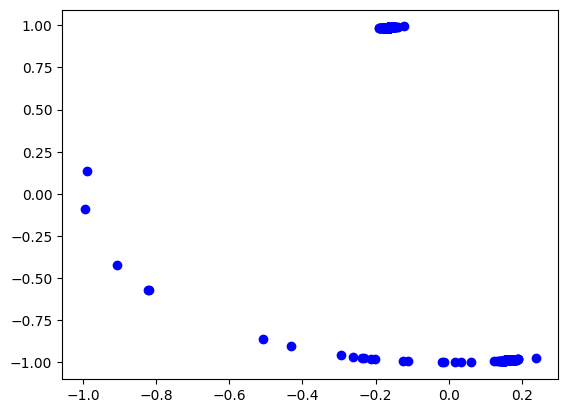

In [70]:
sins = []
coss = []
for start, end in landing_takeoff:
    s = math.sin(end)
    c = math.cos(end)
    sins.append(s)
    coss.append(c)

plt.plot(sins, coss, 'bo')